In [90]:
import re
import copy

import pandas as pd

from time import sleep
from datetime import datetime
from tqdm.notebook import tqdm

from bs4 import BeautifulSoup

from theguardian import theguardian_tag
from theguardian import theguardian_content


In [84]:
def get_query_results(q, section):
    # get the apple tags
    headers = {
        "q": q,
        "section": section,
    }
    tag = theguardian_tag.Tag(api=API_KEY, **headers)

    # get the results
    tag_content = tag.get_content_response()
    results = tag.get_results(tag_content)
    return results

In [91]:
results = get_query_results("tesla", 'technology')
results

[{'id': 'technology/tesla',
  'type': 'keyword',
  'sectionId': 'technology',
  'sectionName': 'Technology',
  'webTitle': 'Tesla',
  'webUrl': 'https://www.theguardian.com/technology/tesla',
  'apiUrl': 'https://content.guardianapis.com/technology/tesla',
  'description': 'Tesla is an automotive and energy storage company that designs, manufactures, and sells electric cars, electric vehicle powertrain components, and battery products.'}]

In [117]:
def get_list_of_article_url(tag_apiUrl):
    content = theguardian_content.Content(api=API_KEY, url=tag_apiUrl)#,  page=41)
    content_response = content.get_content_response()
    nb_pages = content_response['response']['pages']
    list_of_results_informations = []
    for p in tqdm(range(1, nb_pages+1)):
        response = theguardian_content.Content(api=API_KEY, url=tag_apiUrl,
                                               page=p).get_content_response()
        for res in response['response']['results']:
            list_of_results_informations.append({
                "id": res["id"].replace('/', '_'),
                "type": res['type'],
                'sectionId': res['sectionId'],
                'webPublicationDate': res['webPublicationDate'],
                'webTitle': res['webTitle'],
                'webUrl': res['webUrl'],
                'apiUrl': res['apiUrl']
            })
        sleep(0.1) # I am only allowed 12 request a second 
    results_informations_df = pd.DataFrame(list_of_results_informations)
    return results_informations_df

In [118]:
results = get_query_results("tesla", 'technology')
tesla_theguardian_df = get_list_of_article_url(results[0]["apiUrl"])

  0%|          | 0/41 [00:00<?, ?it/s]

In [119]:
tesla_theguardian_df

,id,type,sectionId,webPublicationDate,webTitle,webUrl,apiUrl
0,business_2021_may_13_fund-management-irretriev...,article,business,2021-05-13T16:27:08Z,"Fund management ‘irretrievably broken’, says s...",https://www.theguardian.com/business/2021/may/...,https://content.guardianapis.com/business/2021...
1,business_2021_may_05_uk-car-sales-rebound-afte...,article,business,2021-05-05T09:21:07Z,UK car sales rebound after ‘one of darkest yea...,https://www.theguardian.com/business/2021/may/...,https://content.guardianapis.com/business/2021...
2,business_2021_apr_28_us-automakers-rules-auto-...,article,technology,2021-04-28T16:49:27Z,US automakers outline rules for auto-driving c...,https://www.theguardian.com/business/2021/apr/...,https://content.guardianapis.com/business/2021...
3,technology_2021_apr_26_tesla-record-quarterly-...,article,technology,2021-04-26T21:47:50Z,Tesla reports record quarterly profit as elect...,https://www.theguardian.com/technology/2021/ap...,https://content.guardianapis.com/technology/20...
4,commentisfree_2021_apr_25_elon-musk-jeff-bezos...,article,commentisfree,2021-04-25T05:00:07Z,"In space, no one will hear Bezos and Musk’s wo...",https://www.theguardian.com/commentisfree/2021...,https://content.guardianapis.com/commentisfree...
...,...,...,...,...,...,...,...
399,media_2008_dec_24_jeremy-clarkson-top-gear-tes...,article,tv-and-radio,2008-12-24T07:11:09Z,Top Gear's Jeremy Clarkson under fire over Tes...,https://www.theguardian.com/media/2008/dec/24/...,https://content.guardianapis.com/media/2008/de...
400,technology_blog_2008_dec_01_engineering-automo...,article,technology,2008-12-01T22:42:56Z,Why Obama should treat the car industry like t...,https://www.theguardian.com/technology/blog/20...,https://content.guardianapis.com/technology/bl...
401,environment_2008_oct_16_alternativeenergy-usa,article,environment,2008-10-16T08:20:53Z,Electric car manufacturer hit by financial crisis,https://www.theguardian.com/environment/2008/o...,https://content.guardianapis.com/environment/2...
402,business_2008_jul_01_automotive.greenbusiness,article,business,2008-07-01T16:06:40Z,California beats New Mexico in race to build z...,https://www.theguardian.com/business/2008/jul/...,https://content.guardianapis.com/business/2008...


In [112]:
tesla_theguardian_df.loc[:, "webPublicationDate"] = tesla_theguardian_df["webPublicationDate"].apply(lambda dt: datetime.strptime(dt, "%Y-%m-%dT%H:%M:%SZ"))

<AxesSubplot:>

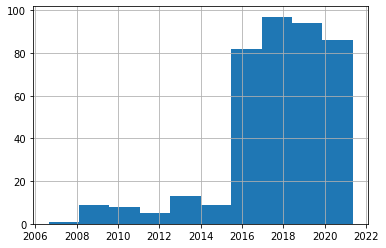

In [113]:
tesla_theguardian_df.webPublicationDate.hist()

In [120]:
tesla_theguardian_df.to_csv('/home/jupyter/data/ner/theguardian/tesla_theguardian_df.csv')

In [77]:
# def preprocess_html_txt(txt):
# #     return txt
#     txt_ = copy.deepcopy(txt)
#     txt_ = re.sub("<a href[^>]+>", "", txt_)
#     txt_ = re.sub("</a>", "", txt_)
#     txt_ = re.sub("<h\d>", "", txt_)
#     txt_ = re.sub("</h\d>", "", txt_)
#     txt_ = re.sub("<figcaption([^<]|\s)*</figcaption>", "", txt_)
#     txt_ = re.sub("<iframe([^<]|\s)*</iframe>", "", txt_)
#     txt_ = re.sub("<figure([^<]|\s)*</figure>", "", txt_)
#     txt_ = re.sub("<img[^>]+/>", "", txt_)
#     txt_ = re.sub("<span[^>]*>", "", txt_)
#     txt_ = re.sub("</span>", "", txt_)
#     txt_ = re.sub("<aside([^<]|\s)*</aside>", "", txt_)
#     txt_ = re.sub("</p>\s*<p>", "\n\n", txt_)
#     txt_ = re.sub("</p>", "", txt_)
#     txt_ = re.sub("<p>", "", txt_)
#     txt_ = re.sub("<li>", "", txt_)
#     txt_ = re.sub("</li>", "", txt_)
#     txt_ = re.sub("<ul>", "", txt_)
#     txt_ = re.sub("</ul>", "", txt_)
#     txt_ = re.sub("</ul>", "", txt_)
#     txt_ = re.sub("<aside([^<]|\s)*</aside>", "", txt_)
#     html_elems = set([x for x in re.findall("<[^>]+>", txt_)])
#     if len(html_elems) > 0:
#         for html in html_elems:
#             print(html)
# #         assert 1==0
#     return txt_

In [92]:
def dowload_articles_content(theguardian_df):
    
    header = {
        "show-fields": ["body"]
    }
    
    for article_key, article_api_uri in tqdm(theguardian_df[["id", "apiUrl"]].values):
        content = theguardian_content.Content(api=API_KEY, url=article_api_uri,
                                              **header).get_content_response()
        txt = content['response']['content']['fields']['body']
        preprocess_txt = BeautifulSoup(txt, 'html.parser').get_text()
        with open("/home/jupyter/data/ner/theguardian/articles/" + article_key + ".txt", "w") as f:
            f.write(preprocess_txt)
        sleep(0.1)


In [93]:
dowload_articles_content(tesla_theguardian_df)

  0%|          | 0/404 [00:00<?, ?it/s]

In [122]:



# get content response
content_response = content.get_content_response()

In [123]:
content_response

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'content': {'id': 'technology/2020/nov/06/tesla-investor-defends-electric-carmakers-soaring-share-price',
   'type': 'article',
   'sectionId': 'technology',
   'sectionName': 'Technology',
   'webPublicationDate': '2020-11-06T12:24:55Z',
   'webTitle': "Tesla investor defends electric carmaker's soaring share price",
   'webUrl': 'https://www.theguardian.com/technology/2020/nov/06/tesla-investor-defends-electric-carmakers-soaring-share-price',
   'apiUrl': 'https://content.guardianapis.com/technology/2020/nov/06/tesla-investor-defends-electric-carmakers-soaring-share-price',
   'fields': {'body': '<p>One of the biggest investors in Tesla has defended the explosive growth in the US electric carmaker’s share price, arguing that it is “far from an aberration”.</p> <p><a href="https://www.theguardian.com/money/2020/sep/11/scottish-firm-investing-in-tesla-baillie-gifford">Baillie Gifford</a>, the Edinburgh-based inves

In [126]:
import re

In [129]:
txt = content_response['response']['content']['fields']['body']
txt

'<p>One of the biggest investors in Tesla has defended the explosive growth in the US electric carmaker’s share price, arguing that it is “far from an aberration”.</p> <p><a href="https://www.theguardian.com/money/2020/sep/11/scottish-firm-investing-in-tesla-baillie-gifford">Baillie Gifford</a>, the Edinburgh-based investment manager that runs the Scottish Mortgage Investment Trust (SMIT), has been the second-biggest winner from Tesla’s rocketing share price, beaten only by Tesla’s outspoken chief executive, <a href="https://www.theguardian.com/business/2020/aug/19/elon-musk-becomes-worlds-fourth-richest-man-on-tesla-boom">Elon Musk</a>.</p> <p>Tesla has rapidly risen to become the world’s most valuable carmaker, outstripping the likes of Volkswagen and Toyota despite producing only a fraction of the cars. Its shares have risen from the equivalent of about $7 in 2013, when Baillie Gifford first invested, to more than $438 after trading closed on Thursday. Its market value has quintuple

In [136]:
for b in :
    print(b)

</p>
<a href="https://www.theguardian.com/business/2020/nov/03/new-lockdown-same-economic-victims-young-low-paid-workers">
<figcaption>
<iframe src="https://www.theguardian.com/email/form/plaintone/3887" height="52px" data-form-title="Sign up for Business Today" data-form-description="Get the headlines and editors' picks every weekday morning." scrolling="no" seamless frameborder="0" class="iframed--overflow-hidden email-sub__iframe ja-email-sub__iframe js-email-sub__iframe--article" data-form-success-desc="Thanks for signing up">
</iframe>
<figure class="element element-embed" data-alt="Sign up">
<a href="https://www.theguardian.com/technology/2020/jul/18/tesla-valuation-elon-musk-profit">
</figure>
<a href="https://www.theguardian.com/money/2020/sep/11/scottish-firm-investing-in-tesla-baillie-gifford">
<a href="https://www.theguardian.com/business/2020/aug/19/elon-musk-becomes-worlds-fourth-richest-man-on-tesla-boom">
</figcaption>
</a>
<p>


In [140]:
import copy

In [160]:
def preprocess_html_txt(txt):
    txt_ = copy.deepcopy(txt)
    txt_ = re.sub("<a href[^>]+>", "", txt_)
    txt_ = re.sub("</a>", "", txt_)
    txt_ = re.sub("<figcaption>[^<]+</figcaption>", "", txt_)
    txt_ = re.sub("<iframe[^>]+></iframe>", "", txt_)
    txt_ = re.sub("<figure[^>]+>\s*</figure>", "", txt_)
    txt_ = re.sub("</p>\s*<p>", "\n\n", txt_)
    txt_ = re.sub("</p>", "", txt_)
    txt_ = re.sub("<p>", "", txt_)
    html_elems = set([x for x in re.findall("<[^>]+>", txt_)])
    if len(html_elems) > 0:
        for html in html_elems:
            print(html)
    return txt_


print(preprocess_html_txt(txt))

One of the biggest investors in Tesla has defended the explosive growth in the US electric carmaker’s share price, arguing that it is “far from an aberration”.

Baillie Gifford, the Edinburgh-based investment manager that runs the Scottish Mortgage Investment Trust (SMIT), has been the second-biggest winner from Tesla’s rocketing share price, beaten only by Tesla’s outspoken chief executive, Elon Musk.

Tesla has rapidly risen to become the world’s most valuable carmaker, outstripping the likes of Volkswagen and Toyota despite producing only a fraction of the cars. Its shares have risen from the equivalent of about $7 in 2013, when Baillie Gifford first invested, to more than $438 after trading closed on Thursday. Its market value has quintupled during 2020 to $415bn.

The rise has astonished many of Tesla’s army of admirers, as well as critics who argue it is a massive investment bubble. However, SMIT, an investment fund listed on the FTSE 100, argued that Tesla, which has been profit

In [154]:
for b in set([x for x in re.findall("<[^>]+>", txt_)]):
    print(b)

</p>
<p>
